In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

text_df=pd.read_csv("C:\\Users\\LENOVO\OneDrive - Amrita Vishwa Vidyapeetham\\Desktop\\orinigalcleaeddataset - orinigalcleaeddataset.csv")

In [20]:
text_df

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.000000,Neutral
1,world wrong side history year hopefully bigges...,-0.500000,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000000,Neutral
3,facts immutable senator even youre ethically s...,0.100000,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000000,Neutral
...,...,...,...
10538,ruvanw gmalavige chandi2012 already 3rd pfizer...,0.000000,Neutral
10539,number covid19 cases today 17 november 2021 re...,0.000000,Neutral
10540,number covid19 cases today 16 november 2021 re...,0.000000,Neutral
10541,pfizerbiontech developed new pill paxlovid inc...,-0.121212,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

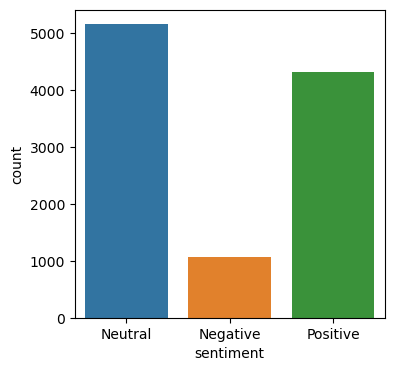

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
sns.countplot(x='sentiment', data = text_df)

In [22]:
text_df.head()
x=text_df['text']
y=text_df['sentiment']
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])
vect

CountVectorizer(ngram_range=(1, 2))

<AxesSubplot:ylabel='count'>

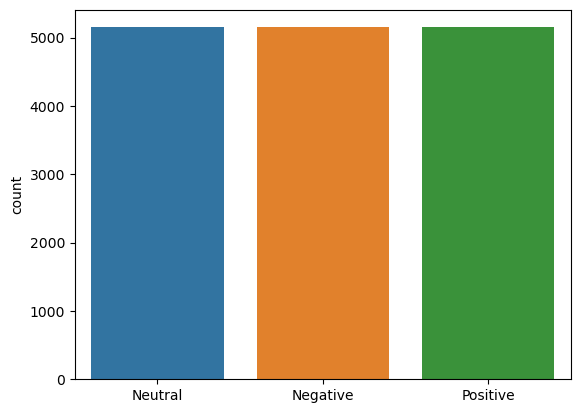

In [23]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_train_res,y_train_res = sm.fit_resample(X,Y.ravel())
sns.countplot(x=y_train_res,data=text_df)

accuracy: 82.21%
classification_report
              precision    recall  f1-score   support

    Negative       0.75      0.90      0.82      1048
     Neutral       0.83      0.81      0.82      1009
    Positive       0.92      0.75      0.83      1034

    accuracy                           0.82      3091
   macro avg       0.83      0.82      0.82      3091
weighted avg       0.83      0.82      0.82      3091



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


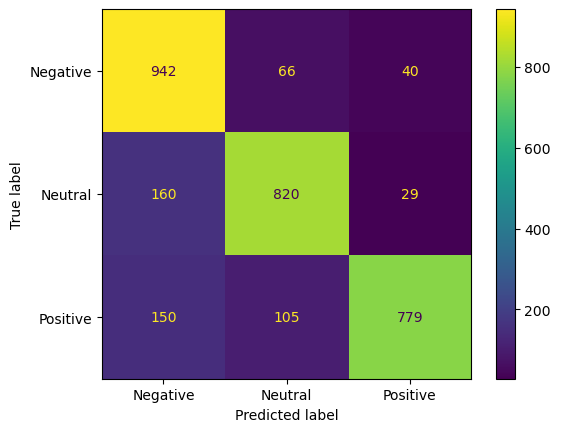

In [41]:
#model 1 LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=100)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("accuracy: {:.2f}%".format(logreg_acc*100))
print("classification_report")
print(classification_report(y_test,logreg_pred))

cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()
# Apply Stratified K-Fold Cross-Validation and calculate accuracy
scores = cross_val_score(logistic_regression, x_train_res, y_train_res, cv=5)
print(scores)
mean_accuracy = scores.mean()
print("Logistic Regression Accuracy: {:.2f}".format(mean_accuracy))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.62665804 0.85506309 0.87544484 0.84368932 0.70161812]
Logistic Regression Accuracy: 0.78


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_rf)
print(" accuracy: {:.2f}%".format(accuracy * 100))

# Print confusion matrix and classification report

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


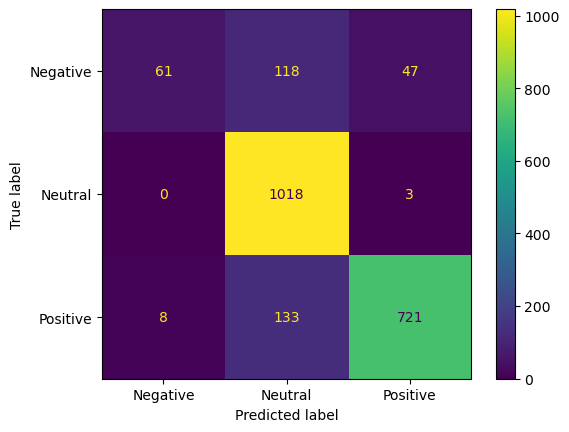

In [13]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_classifier.classes_)
disp.plot()

Test accuracy: 78.68%
Confusion Matrix:
[[923  70  41]
 [204 782  39]
 [185 120 727]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.89      0.79      1034
     Neutral       0.80      0.76      0.78      1025
    Positive       0.90      0.70      0.79      1032

    accuracy                           0.79      3091
   macro avg       0.80      0.79      0.79      3091
weighted avg       0.80      0.79      0.79      3091



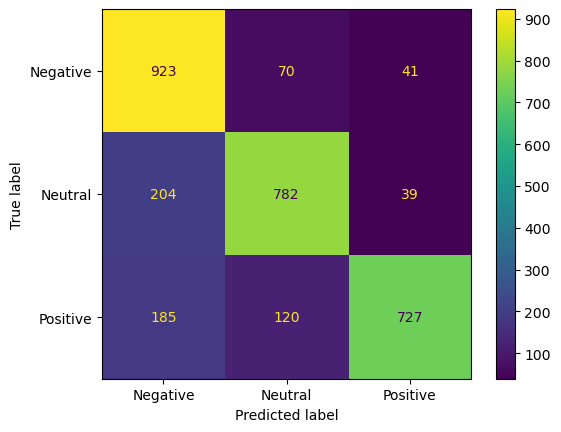

In [27]:

#svm 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear',decision_function_shape='ovr', random_state=42)

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_svm)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



cm = confusion_matrix(y_test,y_pred_svm, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm_classifier.classes_)
disp.plot()

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier,x_train_res, y_train_res, cv=5)  # You can adjust the number of folds (cv) as desired

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-Validation Scores: [0.60562925 0.80685862 0.81268198 0.79902913 0.702589  ]
Average Accuracy: 74.54%


In [37]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test accuracy: {:.2f}%".format(accuracy * 100))

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))





Test accuracy: 72.66%
Confusion Matrix:
[[912  62  60]
 [269 617 139]
 [168 147 717]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.68      0.88      0.77      1034
     Neutral       0.75      0.60      0.67      1025
    Positive       0.78      0.69      0.74      1032

    accuracy                           0.73      3091
   macro avg       0.74      0.73      0.72      3091
weighted avg       0.74      0.73      0.72      3091



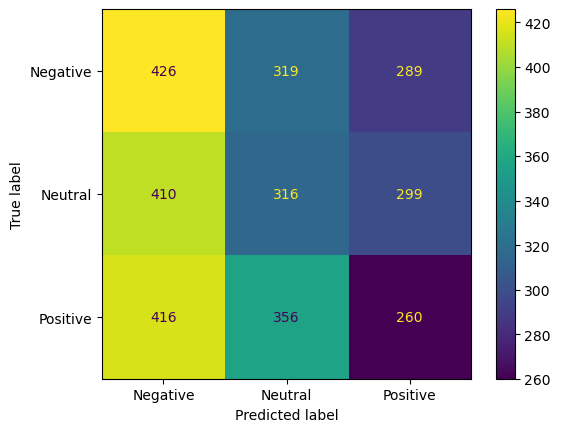

In [38]:
cm = confusion_matrix(y_test, logreg_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_classifier.classes_)
disp.plot()

In [40]:
#rondom forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, x_train_res, y_train_res, cv=5)  # You can adjust the number of folds (cv) as desired

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-Validation Scores: [0.56163054 0.75703656 0.75703656 0.75501618 0.65566343]
Average Accuracy: 69.73%
